# **Challenge TelecomX2-Latam**

## **Preparación de los Datos**

### **1. Importación de bibliotecas**

In [275]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **2. Extracción del archivo**

In [278]:
df_principal = pd.read_csv('/content/drive/MyDrive/Challenge-TelecomX2-LATAM/Datos/TelecomX_Transformacion_Final.csv')
df_principal.head()

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0002-ORFBO,0.0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,2.186667,65.6,593.30
1,0003-MKNFE,0.0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,1.996667,59.9,542.40
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,2.463333,73.9,280.85
3,0011-IGKFF,1.0,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,3.266667,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,2.796667,83.9,267.40


### **2. Eliminación de columnas irrelevantes**

In [279]:
df_principal.columns

Index(['customerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Daily', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [280]:
df_principal = df_principal.drop(columns=['customerID'])
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   float64
 1   Gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   Tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  


In [281]:
df_principal.head()

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0.0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,2.186667,65.6,593.30
1,0.0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,1.996667,59.9,542.40
2,1.0,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,2.463333,73.9,280.85
3,1.0,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,3.266667,98.0,1237.85
4,1.0,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,2.796667,83.9,267.40


### **3. Encoding**

In [282]:
# One-Hot Encoding de variables categóricas
df_principal = pd.get_dummies(
    df_principal,
    columns=[
        'Gender', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaymentMethod'
    ],
    drop_first=True,  # evita multicolinealidad
    dtype=int

)

# Verificar resultado
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7043 non-null   float64
 1   SeniorCitizen                          7267 non-null   int64  
 2   Partner                                7267 non-null   int64  
 3   Dependents                             7267 non-null   int64  
 4   Tenure                                 7267 non-null   int64  
 5   PhoneService                           7267 non-null   int64  
 6   PaperlessBilling                       7267 non-null   int64  
 7   Charges.Daily                          7267 non-null   float64
 8   Charges.Monthly                        7267 non-null   float64
 9   Charges.Total                          7267 non-null   float64
 10  Gender_Male                            7267 non-null   int64  
 11  Mult

In [283]:
df_principal.head()

,Churn,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,Charges.Daily,Charges.Monthly,Charges.Total,Gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0,1,1,9,1,1,2.186667,65.6,593.30,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1
1,0.0,0,0,0,9,1,0,1.996667,59.9,542.40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.0,0,0,0,4,1,1,2.463333,73.9,280.85,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,1.0,1,1,0,13,1,1,3.266667,98.0,1237.85,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
4,1.0,1,1,0,3,1,1,2.796667,83.9,267.40,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [284]:
columnas_a_eliminar = [
    'Charges.Daily',
    'Charges.Total',
    'PhoneService',
    'MultipleLines_Yes',
    'MultipleLines_No phone service',
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service',
    'Gender_Male',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Mailed check'
]

df_principal = df_principal.drop(columns=columnas_a_eliminar)

### **4. Verificación de la proporción de cancelación (Churn)**

In [285]:
# Conteo de clases
churn_counts = df_principal['Churn'].value_counts()

# Proporción (porcentaje)
churn_proportion = df_principal['Churn'].value_counts(normalize=True) * 100

print("Conteo de clientes:")
print(churn_counts)

print("\nProporción de clientes (%):")
print(churn_proportion.round(2))

Conteo de clientes:
Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporción de clientes (%):
Churn
0.0    73.46
1.0    26.54
Name: proportion, dtype: float64


### **5. Balanceo de Clases**

#### **Técnica aplicable Oversampling con SMOTE**

In [286]:
df_principal.dropna(subset=['Churn'], inplace=True)
X = df_principal.drop(columns=['Churn'])
y = df_principal['Churn']

In [287]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [288]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar nuevo balance
print(y_train_smote.value_counts())

Churn
0.0    3622
1.0    3622
Name: count, dtype: int64


In [289]:
# Entrenar el modelo con datos balanceados
from sklearn.linear_model import LogisticRegression

modelo_smote = LogisticRegression(max_iter=1000)
modelo_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

In [290]:
# Evaluación del modelo balanceado
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = modelo_smote.predict(X_test)
y_prob = modelo_smote.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 3))

              precision    recall  f1-score   support

         0.0       0.88      0.76      0.81      1552
         1.0       0.51      0.70      0.59       561

    accuracy                           0.74      2113
   macro avg       0.69      0.73      0.70      2113
weighted avg       0.78      0.74      0.75      2113

Matriz de confusión:
[[1172  380]
 [ 166  395]]
ROC-AUC: 0.815


### **6. Normalización o Estandarización en los datos**

#### **Separar las variables númericas**

In [291]:
# Identificar columnas numéricas a escalar
num_cols = ['Tenure', 'Charges.Monthly']

#### **Aplicar estandarización a los datos**

In [292]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar TRAIN
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Transformar TEST (sin volver a ajustar)
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### **Visualizar la estandarización**

In [293]:
X_train[num_cols].describe()

,Tenure,Charges.Monthly
count,4.930000e+03,4.930000e+03
mean,-8.935832e-17,-1.697087e-16
std,1.000101e+00,1.000101e+00
min,-1.322612e+00,-1.550105e+00
25%,-9.566470e-01,-9.560902e-01
50%,-1.433919e-01,1.813322e-01
75%,9.545025e-01,8.276137e-01
max,1.605107e+00,1.780029e+00


#### **Visualizar las distribuciónes con un histograma**

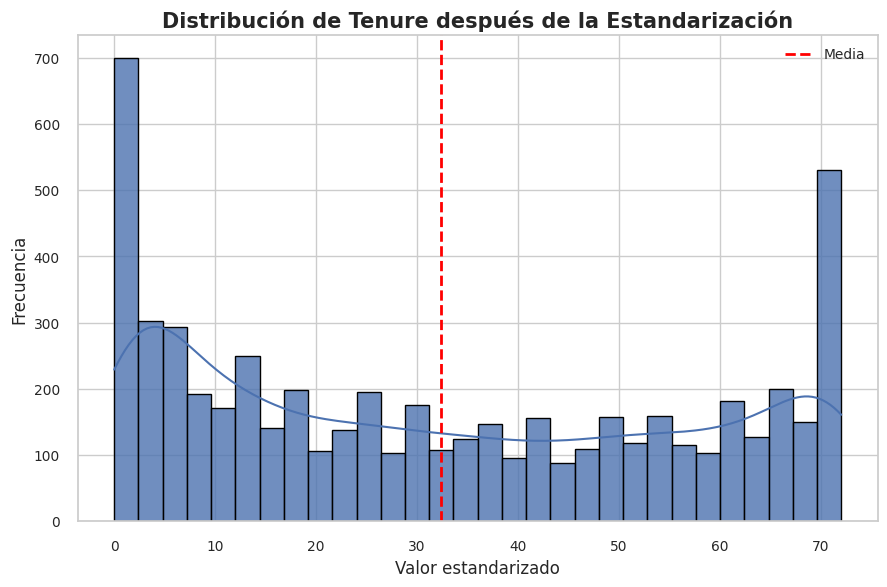

In [345]:
# Estilo general
sns.set_style("whitegrid")

plt.figure(figsize=(9,6))

sns.histplot(
    X_train['Tenure'],
    bins=30,
    kde=True,              # Curva de densidad
    color="#4C72B0",       # Color elegante
    edgecolor="black",
    alpha=0.8
)

plt.axvline(
    X_train['Tenure'].mean(),
    color='red',
    linestyle='--',
    linewidth=2,
    label='Media'
)

plt.title(
    'Distribución de Tenure después de la Estandarización',
    fontsize=15,
    fontweight='bold'
)

plt.xlabel('Valor estandarizado', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.legend()
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Challenge-TelecomX2-LATAM/Graficos/Gráfico-Tenure-vs-Estandarización.png", dpi=300)
plt.show()

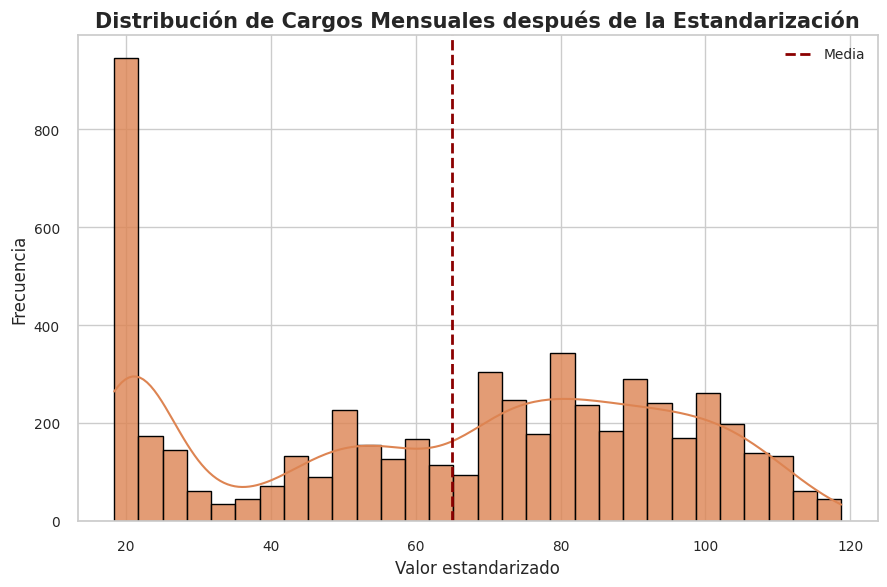

In [344]:
# Estilo visual limpio
sns.set_style("whitegrid")

plt.figure(figsize=(9,6))

sns.histplot(
    X_train['Charges.Monthly'],
    bins=30,
    kde=True,               # Curva de densidad
    color="#DD8452",        # Color distinto para diferenciar variables
    edgecolor="black",
    alpha=0.8
)

# Línea de la media
plt.axvline(
    X_train['Charges.Monthly'].mean(),
    color='darkred',
    linestyle='--',
    linewidth=2,
    label='Media'
)

plt.title(
    'Distribución de Cargos Mensuales después de la Estandarización',
    fontsize=15,
    fontweight='bold'
)

plt.xlabel('Valor estandarizado', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.legend()
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Challenge-TelecomX2-LATAM/Graficos/Gráfico-CargosMensuales-vs-Estandarización.png", dpi=300)
plt.show()

## **Correlación y Selección de Variables**

### **1. Análisis de Correlación**

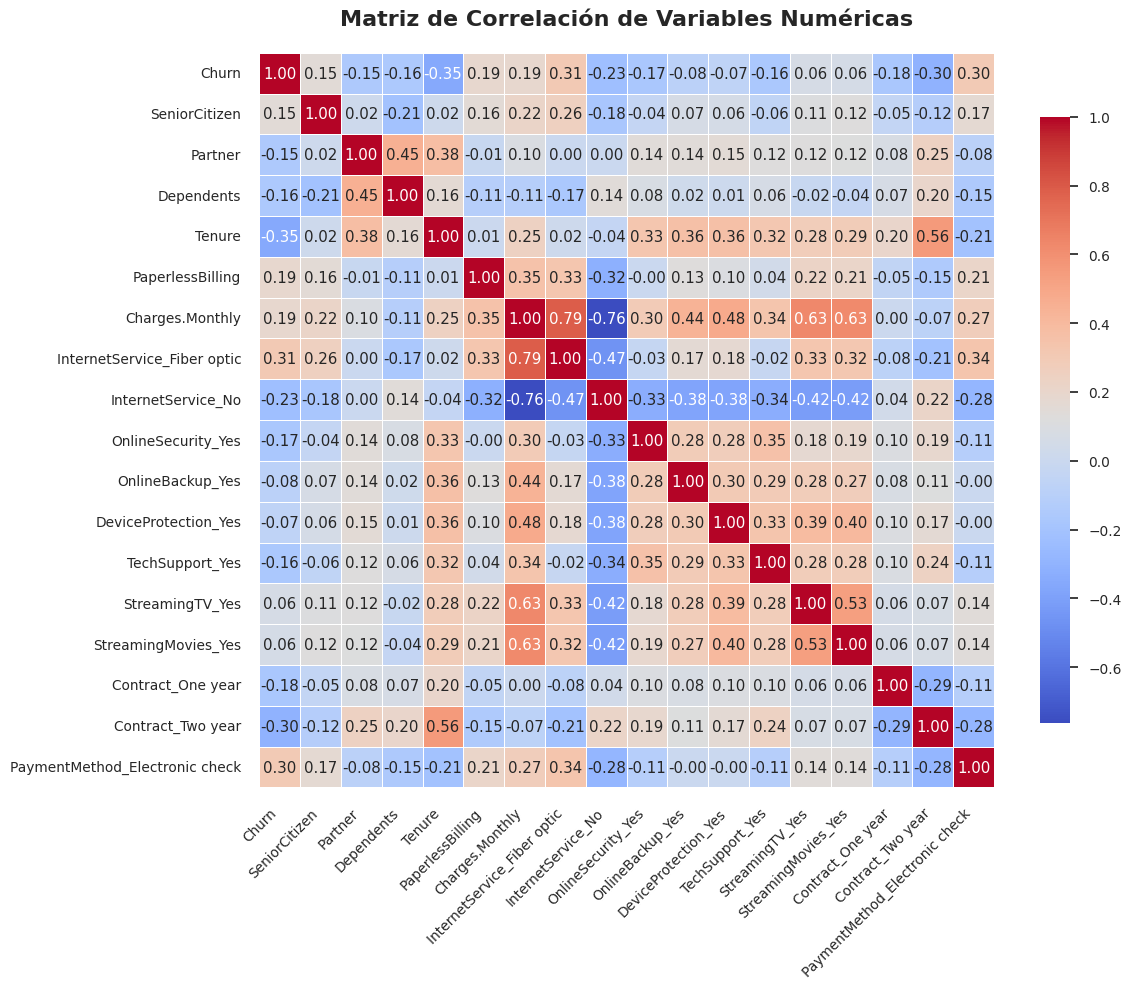

In [343]:
# Seleccionar solo variables numéricas
variables_numericas = df_principal.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
corr_matrix = variables_numericas.corr()

# Configurar estilo
sns.set(style="white", font_scale=0.9)

plt.figure(figsize=(12, 10))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={"shrink": 0.8},
    square=True
)

plt.title(
    'Matriz de Correlación de Variables Numéricas',
    fontsize=16,
    fontweight='bold',
    pad=20
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Challenge-TelecomX2-LATAM/Graficos/Gráfico-Matriz-de-Correlación.png", dpi=300)
plt.show()

In [297]:
# Mostrar correlación de cada variable con Churn
correlacion_churn = corr_matrix['Churn'].sort_values(ascending=False)
print("Correlación de las variables numéricas con Churn:")
print(correlacion_churn)

Correlación de las variables numéricas con Churn:
Churn                             1.000000
InternetService_Fiber optic       0.308020
PaymentMethod_Electronic check    0.301919
Charges.Monthly                   0.193356
PaperlessBilling                  0.191825
SeniorCitizen                     0.150889
StreamingTV_Yes                   0.063228
StreamingMovies_Yes               0.061382
DeviceProtection_Yes             -0.066160
OnlineBackup_Yes                 -0.082255
Partner                          -0.150448
Dependents                       -0.164221
TechSupport_Yes                  -0.164674
OnlineSecurity_Yes               -0.171226
Contract_One year                -0.177820
InternetService_No               -0.227890
Contract_Two year                -0.302253
Tenure                           -0.352229
Name: Churn, dtype: float64


### **2. Análisis Dirigido**

#### **Boxplot — Distribución del Tiempo de Contrato según Cancelación**

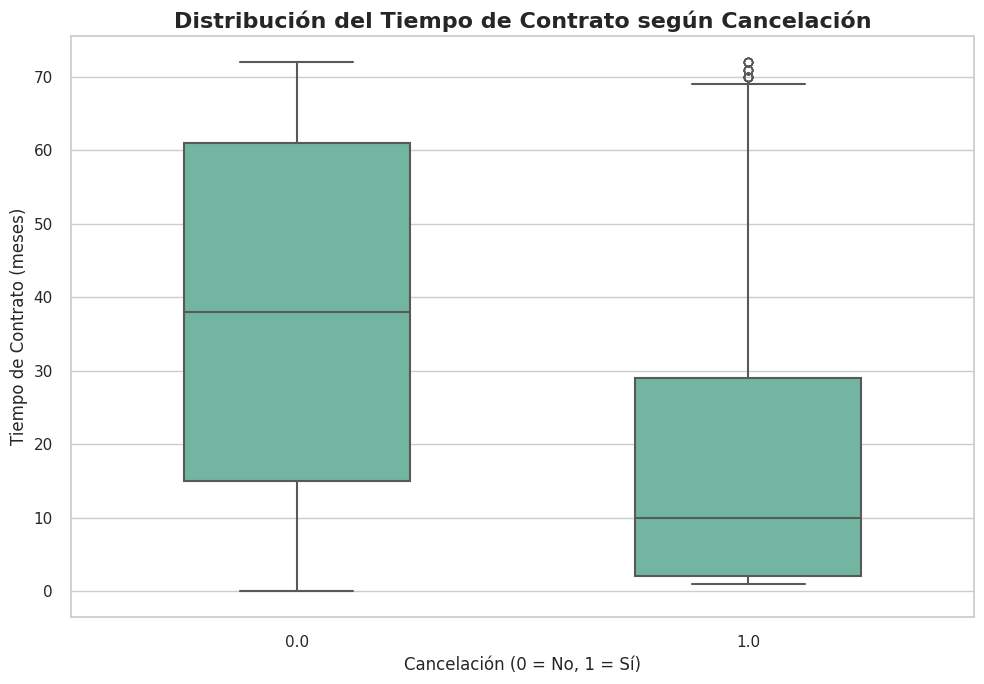

In [341]:
sns.set_theme(style="whitegrid", palette="Set2")

plt.figure(figsize=(10, 7))

sns.boxplot(
    x='Churn',
    y='Tenure',
    data=df_principal,
    width=0.5,
    linewidth=1.5,
    showfliers=True
)

# Títulos y etiquetas
plt.title('Distribución del Tiempo de Contrato según Cancelación',
          fontsize=16, fontweight='bold')
plt.xlabel('Cancelación (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Tiempo de Contrato (meses)', fontsize=12)

# Ajustes finales
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Challenge-TelecomX2-LATAM/Graficos/Gráfico-TiempoContrato-según-Cancelación.png", dpi=300)
plt.show()

#### **Boxplot — Distribución del Gasto Mensual según Cancelación**

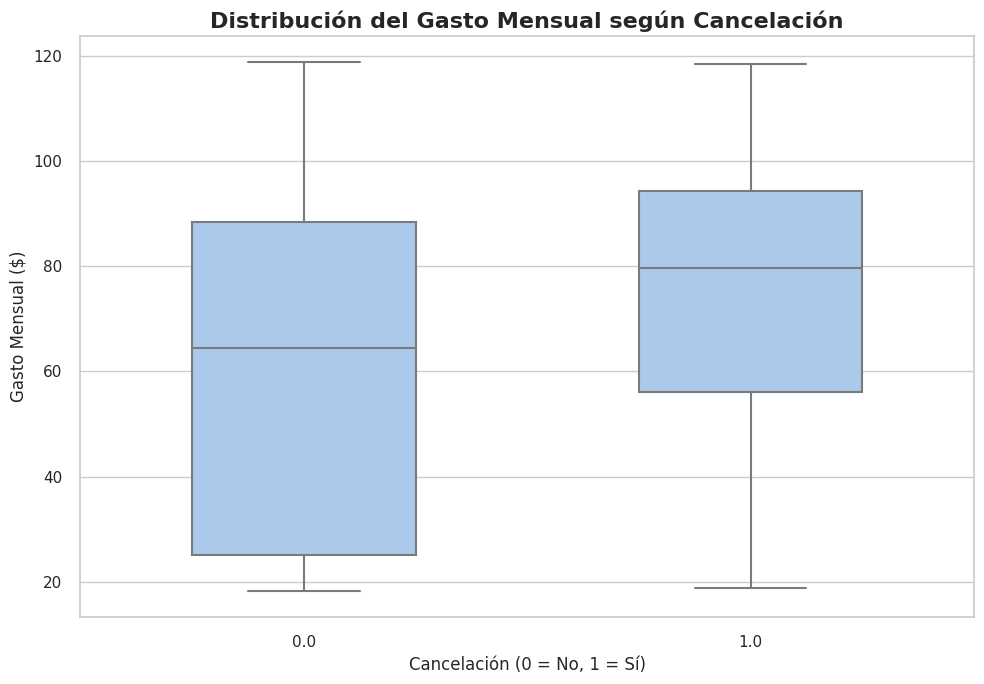

In [340]:
# Estilo visual
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(10, 7))

sns.boxplot(
    x='Churn',
    y='Charges.Monthly',
    data=df_principal,
    width=0.5,
    linewidth=1.5,
    showfliers=True
)

# Títulos y etiquetas
plt.title('Distribución del Gasto Mensual según Cancelación',
          fontsize=16, weight='bold')
plt.xlabel('Cancelación (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Gasto Mensual ($)', fontsize=12)

# Ajustes finales
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Challenge-TelecomX2-LATAM/Graficos/Gráfico-GastoMensual-según-Cancelación.png", dpi=300)
plt.show()

#### **Scatter Plot — Relación entre Tiempo de Contrato y Gasto Mensual según Cancelación**

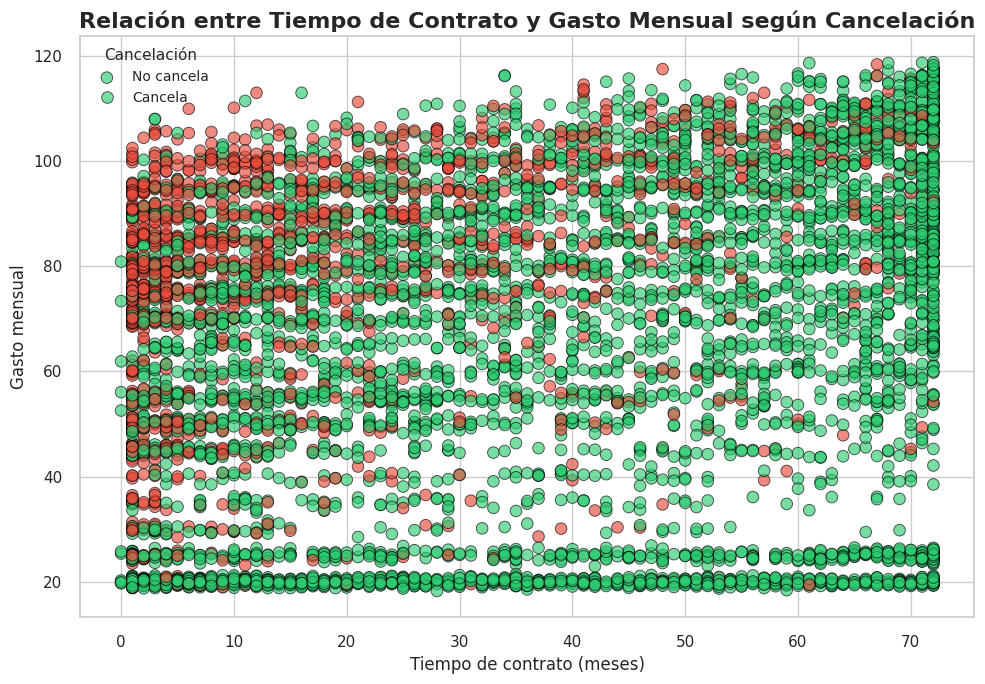

In [339]:
# Estilo moderno y limpio
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 7))

sns.scatterplot(
    data=df_principal,
    x='Tenure',
    y='Charges.Monthly',
    hue='Churn',
    palette={0: '#2ecc71', 1: '#e74c3c'},  # verde = no churn, rojo = churn
    alpha=0.65,
    s=70,
    edgecolor='black'
)

# Títulos y etiquetas
plt.title(
    'Relación entre Tiempo de Contrato y Gasto Mensual según Cancelación',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('Tiempo de contrato (meses)', fontsize=12)
plt.ylabel('Gasto mensual', fontsize=12)

# Leyenda personalizada
plt.legend(
    title='Cancelación',
    labels=['No cancela', 'Cancela'],
    title_fontsize=11,
    fontsize=10,
    loc='upper left'
)

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Challenge-TelecomX2-LATAM/Graficos/Gráfico-TipoContrato-vs-GastoMensual.png", dpi=300)
plt.show()

#### **Facet Grid - Distribución del Gasto Mensual según Cancelación y Tipo de Contrato**

/tmp/ipython-input-58594654.py:32: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-58594654.py:32: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-58594654.py:32: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



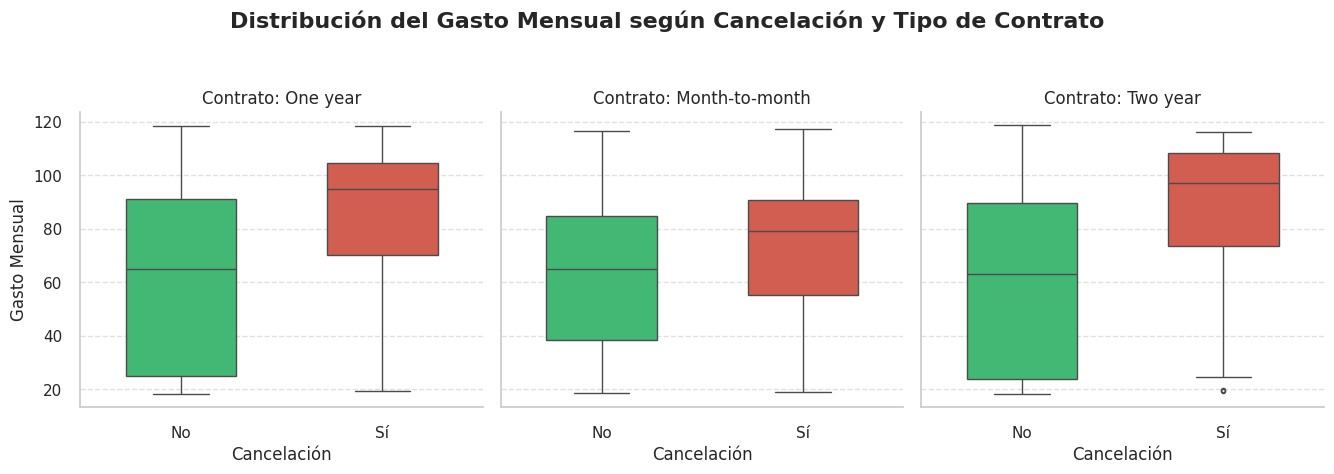

In [338]:
# Estilo general
sns.set_theme(style="whitegrid")

# Paleta semántica
palette = {0: "#2ecc71", 1: "#e74c3c"}  # Verde = No churn, Rojo = Churn

g = sns.FacetGrid(
    df,
    col="Contract",
    height=4.5,
    aspect=1,
    sharey=True
)

g.map_dataframe(
    sns.boxplot,
    x="Churn",
    y="Charges.Monthly",
    hue="Churn",  # Explicitly set hue to Churn
    palette=palette,
    width=0.55,
    fliersize=3,
    legend=False # Set legend to False as FacetGrid handles it
)

# Etiquetas y títulos
g.set_axis_labels("Cancelación", "Gasto Mensual")
g.set_titles(col_template="Contrato: {col_name}")

# Ajustes visuales por subplot
for ax in g.axes.flat:
    ax.set_xticklabels(["No", "Sí"])
    ax.set_xlabel("Cancelación")
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Título general
g.fig.suptitle(
    "Distribución del Gasto Mensual según Cancelación y Tipo de Contrato",
    fontsize=16,
    fontweight="bold",
    y=1.05
)

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Challenge-TelecomX2-LATAM/Graficos/Gráfico-Distribución-GastoMensual-vs-Cancelación.png", dpi=300)
plt.show()

## **Modelado Predictivo**

### **1. Separación de Datos**

#### **Separar variables predictoras (X) y objetivo (y)**

In [302]:
X = df_principal.drop('Churn', axis=1)
y = df_principal['Churn']

#### **División en entrenamiento y prueba (80% / 20%)**

In [303]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

#### **Verificación rápida de tamaños**

In [304]:
print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Distribución y_train:")
print(y_train.value_counts(normalize=True))

Tamaño X_train: (5634, 17)
Tamaño X_test: (1409, 17)
Distribución y_train:
Churn
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64


### **2. Creación de Modelos**

#### **MODELO 1: REGRESIÓN LOGÍSTICA (CON NORMALIZACIÓN)**

In [305]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [306]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [307]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_log = log_model.predict(X_test_scaled)

print("Regresión Logística")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Regresión Logística
[[930 105]
 [175 199]]
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1035
         1.0       0.65      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



#### **MODELO 2: RANDOM FOREST (SIN NORMALIZACIÓN)**

In [308]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [309]:
y_pred_rf = rf_model.predict(X_test)

print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
[[929 106]
 [193 181]]
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1035
         1.0       0.63      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



### **3. Evaluación de los Modelos**

#### **Evaluación de métricas**

In [310]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

def evaluar_modelo(nombre, y_true, y_pred):
    print(f"\n📌 Modelo: {nombre}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_true, y_pred))
    print("\nReporte de Clasificación:")
    print(classification_report(y_true, y_pred))

#### **Evaluación: Regresión Logística**

In [311]:
y_pred_log = log_model.predict(X_test_scaled)
evaluar_modelo("Regresión Logística", y_test, y_pred_log)


📌 Modelo: Regresión Logística
Accuracy: 0.801277501774308
Precision: 0.6546052631578947
Recall: 0.5320855614973262
F1-score: 0.5870206489675516

Matriz de Confusión:
[[930 105]
 [175 199]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1035
         1.0       0.65      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



#### **Evaluación: Random Forest**

In [312]:
y_pred_rf = rf_model.predict(X_test)
evaluar_modelo("Random Forest", y_test, y_pred_rf)


📌 Modelo: Random Forest
Accuracy: 0.7877927608232789
Precision: 0.6306620209059234
Recall: 0.4839572192513369
F1-score: 0.5476550680786687

Matriz de Confusión:
[[929 106]
 [193 181]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1035
         1.0       0.63      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



## **Interpretación y Conclusiones**

### **1. Análisis de la Importancia de las Variables**

#### **Regresión Logística – Análisis de coeficientes**

In [313]:
coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': log_model.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

coeficientes

,Variable,Coeficiente
6,InternetService_Fiber optic,0.509202
12,StreamingTV_Yes,0.188922
16,PaymentMethod_Electronic check,0.185313
4,PaperlessBilling,0.183179
13,StreamingMovies_Yes,0.140186
0,SeniorCitizen,0.083334
10,DeviceProtection_Yes,0.027538
1,Partner,-0.019468
9,OnlineBackup_Yes,-0.039817
2,Dependents,-0.075772


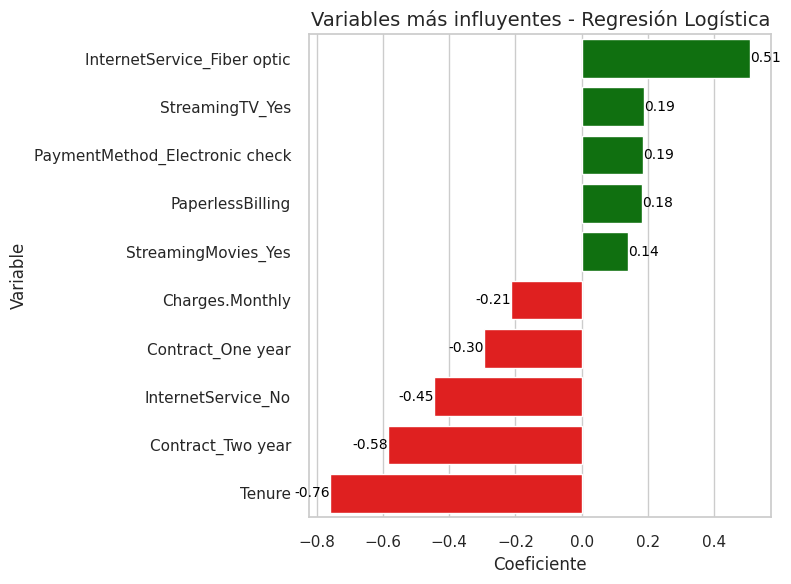

In [337]:
# Tomar los 10 coeficientes más grandes y más pequeños para mayor claridad
top_coef = pd.concat([coeficientes.head(5), coeficientes.tail(5)])

# Crear una columna para el signo del coeficiente para usar con 'hue'
top_coef['Signo'] = top_coef['Coeficiente'].apply(lambda x: 'Positivo' if x > 0 else 'Negativo')

# Definir una paleta de colores para 'Signo'
color_palette = {'Positivo': 'green', 'Negativo': 'red'}

# Configuración del gráfico
plt.figure(figsize=(8,6))
sns.barplot(
    x='Coeficiente',
    y='Variable',
    data=top_coef,
    hue='Signo',
    palette=color_palette,
    legend=False
)
plt.title('Variables más influyentes - Regresión Logística', fontsize=14)
plt.xlabel('Coeficiente', fontsize=12)
plt.ylabel('Variable', fontsize=12)

# Agregar valores al lado de las barras
for index, value in enumerate(top_coef['Coeficiente']):
    plt.text(value, index, f'{value:.2f}', va='center',
             ha='left' if value > 0 else 'right', color='black', fontsize=10)

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Challenge-TelecomX2-LATAM/Graficos/Gráfico-Variables-Regresión Logística.png", dpi=300)
plt.show()

#### **KNN – Influencia de los vecinos más cercanos**

In [315]:
from sklearn.inspection import permutation_importance

# Using rf_model instead of knn_model
result = permutation_importance(
    rf_model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42
)

importancias_rf = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': result.importances_mean
}).sort_values(by='Importancia', ascending=False)

importancias_rf

,Variable,Importancia
3,Tenure,0.044074
14,Contract_One year,0.018098
6,InternetService_Fiber optic,0.016466
15,Contract_Two year,0.014123
5,Charges.Monthly,0.013272
9,OnlineBackup_Yes,0.010220
11,TechSupport_Yes,0.008517
8,OnlineSecurity_Yes,0.005891
4,PaperlessBilling,0.004471
0,SeniorCitizen,0.003478


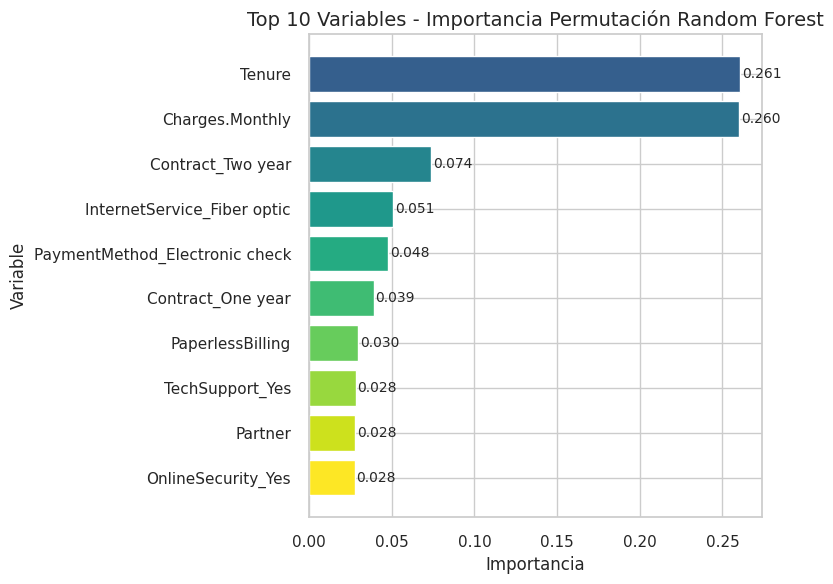

In [336]:
# Tomar las 10 variables más importantes
top_importancias = importancias_rf.head(10)

# Datos
variables = top_importancias['Variable']
importancias = top_importancias['Importancia']

# Crear degradado de colores (de azul claro a azul oscuro)
colors = plt.cm.viridis(np.linspace(0.3, 1, len(variables)))

# Crear gráfico
plt.figure(figsize=(8,6))
bars = plt.barh(variables, importancias, color=colors)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.title('Top 10 Variables - Importancia Permutación Random Forest', fontsize=14)
plt.gca().invert_yaxis()  # Para que la variable más importante quede arriba

# Agregar valores exactos al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, f'{width:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Challenge-TelecomX2-LATAM/Graficos/Gráfico-Permutación-Random-Forest.png", dpi=300)
plt.show()

#### **Random Forest – Importancia de variables**

In [317]:
importancias_rf = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

importancias_rf

,Variable,Importancia
3,Tenure,0.260651
5,Charges.Monthly,0.260267
15,Contract_Two year,0.073849
6,InternetService_Fiber optic,0.050810
16,PaymentMethod_Electronic check,0.047908
14,Contract_One year,0.039166
4,PaperlessBilling,0.029679
11,TechSupport_Yes,0.028113
1,Partner,0.027822
8,OnlineSecurity_Yes,0.027518


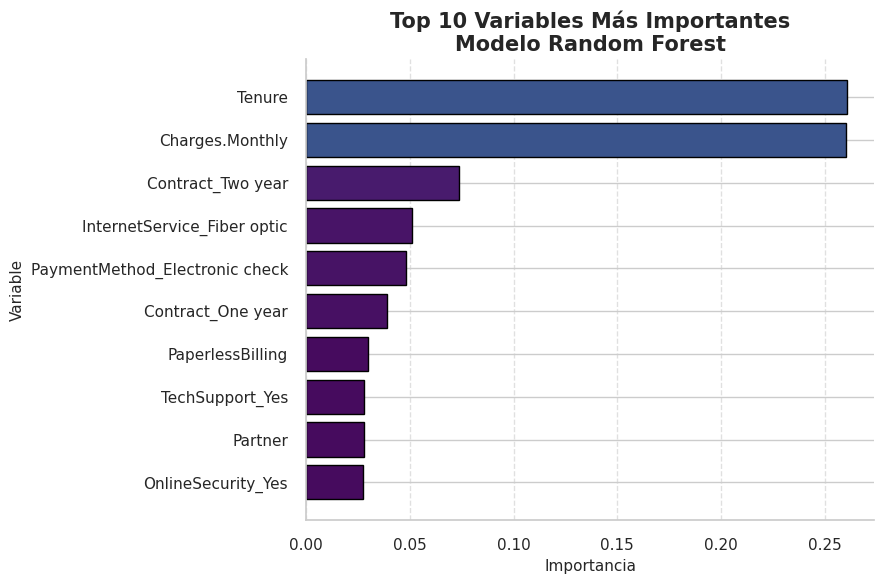

In [335]:
# Colores degradados
colors = plt.cm.viridis(importancias_rf['Importancia'][:10])

plt.figure(figsize=(9,6))

plt.barh(
    importancias_rf['Variable'][:10],
    importancias_rf['Importancia'][:10],
    color=colors,
    edgecolor='black'
)

# Invertir eje Y para que la más importante quede arriba
plt.gca().invert_yaxis()

# Títulos y etiquetas
plt.title(
    'Top 10 Variables Más Importantes\nModelo Random Forest',
    fontsize=15,
    fontweight='bold'
)
plt.xlabel('Importancia', fontsize=11)
plt.ylabel('Variable', fontsize=11)

# Grid suave solo en X
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Quitar bordes innecesarios
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Challenge-TelecomX2-LATAM/Graficos/Gráfico-Modelo-Random-Forest.png", dpi=300)
plt.show()

#### **SVM – Influencia en la frontera de decisión**

In [319]:
# Entrenar un modelo SVM (SVC)
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

print("SVM Model trained successfully!")

SVM Model trained successfully!


In [320]:
svm_coef = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': svm_model.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

svm_coef

,Variable,Coeficiente
6,InternetService_Fiber optic,0.625707
16,PaymentMethod_Electronic check,0.164946
12,StreamingTV_Yes,0.138995
13,StreamingMovies_Yes,0.110037
4,PaperlessBilling,0.098647
0,SeniorCitizen,0.070205
10,DeviceProtection_Yes,0.020499
1,Partner,-0.003403
9,OnlineBackup_Yes,-0.024064
2,Dependents,-0.043492


In [332]:
# Tomar los 10 coeficientes más importantes por magnitud
svm_coef['abs_coef'] = svm_coef['Coeficiente'].abs()
top_svm = svm_coef.sort_values(by='abs_coef', ascending=False).head(10)

# Crear gráfico interactivo
fig = px.bar(
    top_svm,
    x='Coeficiente',
    y='Variable',
    orientation='h',
    color='Coeficiente',
    color_continuous_scale='Viridis',
    text=top_svm['Coeficiente'].round(3),
    title='Top 10 Coeficientes - SVM Lineal'
)

# Ajustes estéticos
fig.update_layout(
    xaxis_title='Coeficiente',
    yaxis_title='Variable',
    yaxis=dict(autorange="reversed"),  # La variable más importante arriba
    coloraxis_colorbar=dict(title="Coeficiente")
)
fig.update_traces(textposition='outside')

fig.show()

## **Transformación Final de la Base de Datos**

### **Visualización de los datos finales con todas las transformaciones realizadas**

In [333]:
df_principal.head()

,Churn,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,Charges.Monthly,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Electronic check
0,0.0,0,1,1,9,1,65.6,0,0,0,1,0,1,1,0,1,0,0
1,0.0,0,0,0,9,0,59.9,0,0,0,0,0,0,0,1,0,0,0
2,1.0,0,0,0,4,1,73.9,1,0,0,0,1,0,0,0,0,0,1
3,1.0,1,1,0,13,1,98.0,1,0,0,1,1,0,1,1,0,0,1
4,1.0,1,1,0,3,1,83.9,1,0,0,0,0,1,1,0,0,0,0


### Paso para guardar la base de datos final transformada

In [334]:
df_principal.to_csv('/content/drive/MyDrive/Challenge-TelecomX2-LATAM/Datos/BD-TelecomX2-Final.csv', index=False)

## **Informe Final**

### **1. Descripción General del Proyecto**

Este proyecto se centra en el análisis de cancelación de clientes (churn) en una empresa de telecomunicaciones. Se trabaja con un conjunto de datos que contiene información sobre clientes, sus características demográficas, servicios contratados, métodos de pago y comportamiento de uso.
El propósito es aplicar técnicas de preprocesamiento de datos, balanceo de clases y modelos de machine learning para identificar los factores que más influyen en la decisión de un cliente de cancelar su servicio.

En esencia, se trata de un proyecto de predicción de churn que combina análisis estadístico, visualizaciones y modelos predictivos para apoyar la toma de decisiones estratégicas en la empresa.

### **2. Objetivos del Proyecto**

**Preprocesar y limpiar los datos**

* Eliminar columnas irrelevantes.

* Codificar variables categóricas.

* Normalizar y estandarizar variables numéricas.

**Analizar el comportamiento de los clientes**

* Identificar patrones de cancelación según antigüedad, gasto mensual, tipo de contrato y servicios adicionales.

* Visualizar relaciones clave mediante gráficos y correlaciones.

**Construir y evaluar modelos predictivos**

* Aplicar algoritmos como Regresión Logística, Random Forest y SVM.

* Comparar métricas de rendimiento (accuracy, precision, recall, F1-score, ROC-AUC).

**Determinar las variables más influyentes en el churn**

* Usar coeficientes de modelos lineales y técnicas de importancia de variables en Random Forest.

* Identificar factores de riesgo y de retención.

**Proponer estrategias de retención**

* Traducir los hallazgos en acciones prácticas para reducir la tasa de cancelación.

* Diseñar políticas de fidelización basadas en evidencia.

### **3. Problemas a Resolver**

**Alta tasa de cancelación de clientes (26.5%)**

* La empresa pierde más de una cuarta parte de sus clientes, lo que afecta ingresos y estabilidad.

**Desbalance de clases en los datos**

* La mayoría de clientes no cancela (73.5%), lo que dificulta entrenar modelos sin técnicas como SMOTE.*

**Identificación de factores clave**

* Determinar qué variables (contrato, método de pago, antigüedad, servicios adicionales) tienen mayor impacto en la decisión de cancelar.**

**Limitaciones en la predicción**

* Los modelos alcanzan un accuracy cercano al 80%, pero aún presentan dificultades para identificar correctamente a los clientes que sí cancelan (recall bajo).

**Necesidad de estrategias de retención basadas en datos**

* La empresa requiere acciones concretas para disminuir el churn, como mejorar soporte técnico, ajustar precios, incentivar contratos largos y atender segmentos vulnerables (adultos mayores, clientes con cargos altos).

### **4. Rendimiento de los Modelos**

* Ningún modelo supera el 0.80 de accuracy, lo que indica que la predicción de cancelación es un problema complejo y multifactorial. La regresión logística y el SVM destacan por su interpretabilidad, mientras que Random Forest aporta robustez y análisis de importancia.

### **5. Factores que más influyen en la cancelación**

**Variables con mayor impacto positivo (aumentan la probabilidad de cancelación)**
* InternetService_Fiber optic → Clientes con fibra óptica muestran mayor propensión a cancelar.

* PaymentMethod_Electronic check → El método de pago electrónico está fuertemente asociado con cancelación.

* PaperlessBilling → Facturación electrónica incrementa la probabilidad de churn.

* SeniorCitizen → Los adultos mayores presentan mayor riesgo de cancelación.

* StreamingTV_Yes / StreamingMovies_Yes → Tener servicios de streaming se asocia con mayor churn.

**Variables con impacto negativo (reducen la probabilidad de cancelación)
Tenure (antigüedad) → A mayor tiempo con la empresa, menor probabilidad de cancelar.**

* Contract_Two year / Contract_One year → Contratos largos reducen significativamente el churn.

* TechSupport_Yes / OnlineSecurity_Yes → Servicios de soporte técnico y seguridad online ayudan a retener clientes.

* Partner / Dependents → Clientes con pareja o dependientes tienden a cancelar menos.

**Variables financieras**

* Charges.Monthly → Cargos mensuales altos se relacionan con mayor churn.

* Charges.Total (cuando estaba presente) → Clientes con gasto acumulado alto suelen permanecer más tiempo.

### **6. Estrategias de Retención Basadas en Resultados**

**Contratos más largos y beneficios asociados**

* Incentivar la migración de clientes de contratos mensuales a contratos anuales o bianuales con descuentos o beneficios exclusivos.

* Ejemplo: “Plan anual con 2 meses gratis + soporte premium”.

**Mejorar soporte y seguridad digital**

* Expandir servicios de TechSupport y OnlineSecurity como parte de paquetes básicos.

* Ofrecer asistencia proactiva a clientes con problemas técnicos para reducir frustración.

**Gestión de precios y cargos mensuales**

* Revisar la estructura de precios para clientes con cargos mensuales altos.

* Ofrecer planes personalizados o descuentos a clientes con mayor gasto para evitar que se sientan sobrecargados.

**Atención especial a clientes con Electronic Check y PaperlessBilling**

* Analizar por qué estos métodos de pago se asocian con mayor churn (¿problemas de usabilidad?, ¿falta de confianza?).

* Ofrecer incentivos para migrar a métodos más estables (tarjeta automática, débito).

**Segmentación de clientes SeniorCitizen**

* Diseñar programas de fidelización específicos para adultos mayores (soporte dedicado, planes simplificados, atención personalizada).

* Reducir barreras tecnológicas con asistencia telefónica y presencial.

**Monitoreo de clientes nuevos (baja Tenure)**

* Los primeros meses son críticos: implementar programas de bienvenida, encuestas de satisfacción y seguimiento proactivo.

* Ejemplo: “Primeros 3 meses con soporte premium gratuito”.

### **7. Conclusión**
La cancelación de clientes está fuertemente influenciada por:

* Tipo de contrato y antigüedad (los contratos largos y clientes fieles cancelan menos).

* Método de pago y facturación electrónica (electronic check y paperless billing elevan el riesgo).

* Servicios adicionales (soporte técnico y seguridad reducen el churn).

* Perfil del cliente (adultos mayores y clientes con altos cargos mensuales son más propensos a cancelar).

Las estrategias de retención deben enfocarse en contratos largos, soporte proactivo, gestión de precios y atención personalizada a segmentos vulnerables.